## Packages

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Dataset


In [100]:
iris = datasets.load_iris()
print(iris.DESCR)
print(iris.data.shape)
print(iris.feature_names)
print(iris.target.shape)
print(iris.target_names)
X = iris.data[:, :2]
Y = iris.target
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Model

In [103]:
logreg = LogisticRegression(multi_class='auto')
logreg.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Ploting training data in classes

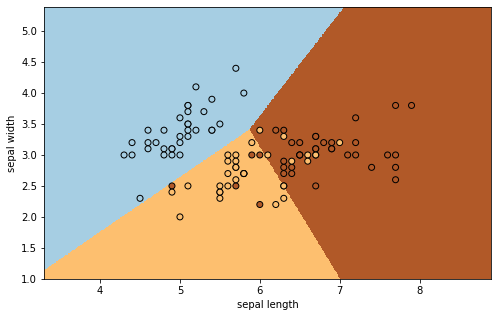

In [101]:
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
h = .01  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.show()

## Ploting test data in classes

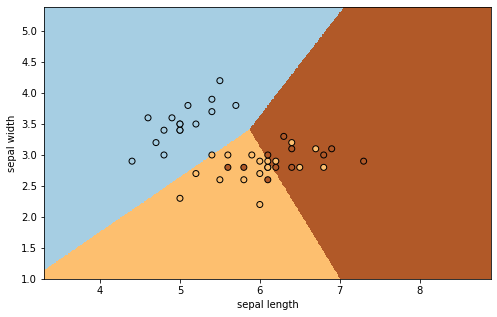

accuracy on test data :  0.8222222222222222


In [96]:
plt.figure(2, figsize=(8, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()


## Accuracy

In [104]:
train_accuracy = logreg.score(x_train, y_train)
print("accuracy on train data : ",train_accuracy)

test_accuracy = logreg.score(x_test, y_test)
print("accuracy on test data : " ,test_accuracy)

accuracy on train data :  0.8285714285714286
accuracy on test data :  0.8222222222222222


## Confusion matrix

[[16  0  0]
 [ 0 13  5]
 [ 0  3  8]]


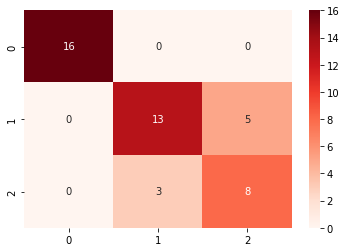

In [105]:
y_pred = logreg.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True,cmap="Reds")
plt.show()
